In [316]:
import pandas as pd
import numpy as np
import os

import requests
import string
from bs4 import BeautifulSoup
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB

from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
import eikon as ek
from IPython.display import HTML
from datetime import datetime, timedelta
import pandas as pd

ek.set_app_key('006f112652724224b9a6c0befae87ced9c033945')

2023-05-23 16:45:23,436 P[4595] [MainThread 4613674496] Error: no proxy address identified.
Check if Eikon Desktop or Eikon API Proxy is running.
2023-05-23 16:45:23,437 P[4595] [MainThread 4613674496] Error on handshake url http://127.0.0.1:None/api/handshake : InvalidURL("Invalid port: 'None'")
2023-05-23 16:45:23,438 P[4595] [MainThread 4613674496] Error on handshake url http://127.0.0.1:None/api/handshake : InvalidURL("Invalid port: 'None'")
2023-05-23 16:45:23,439 P[4595] [MainThread 4613674496] Port number was not identified, cannot send any request


In [58]:
def webscrapp_tittles(web, type_of_title, class_title, typeclass='class'):
    headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36"}
    
    res = requests.get(web, headers=headers)

    soup = BeautifulSoup(res.content, 'html.parser')

    headlines = soup.find_all(type_of_title,{typeclass:class_title})
    headlines_text =[x.get_text() for x in headlines]

    return headlines_text

## Web Scrapping

### ESG News

In [59]:
ESGnews=webscrapp_tittles("https://esgnews.com/",
                  'h2', 
                  "tw-mb-2.5 last:tw-mb-0 tw-font-serif tw-font-medium tw-text-base tw-leading-snug")

In [60]:
FTESG=webscrapp_tittles('https://www.ft.com/esg-investing',
                        "a",
                        "js-teaser-heading-link")

In [61]:
knowesg=webscrapp_tittles('https://www.knowesg.com/',
                            'a',
                            "text-neutral-10 hover:text-primary-dark text-lg transition-colors duration-100 ease-linear sourceserif line-clamp-2")


In [98]:
ReutersESG= webscrapp_tittles('https://www.reuters.com/sustainability/',
                           'a', 
                           "text__text__1FZLe text__dark-grey__3Ml43 text__medium__1kbOh text__heading_5_and_half__3YluN heading__base__2T28j heading_5_half title__title__1Sa2a title")




In [65]:
StandESG=webscrapp_tittles('https://www.standard.co.uk/topic/esg?CMP=ILC-refresh', 
                          'a',
                           'title')

In [81]:
FTIA=webscrapp_tittles( 'https://www.ft.com/investor-activism',
                        "a",
                        "js-teaser-heading-link")

In [94]:
ESG_titles = ESGnews+ FTESG+ knowesg+ ReutersESG + StandESG + FTIA +

In [95]:
len(ESG_titles)

163

In [108]:
ESG_df=pd.DataFrame(ESG_titles, columns=['T'])
ESG_df['S']=1

In [109]:
ESG_df

,T,S
0,\n\n Volvo Group Signs Deal With ...,1
1,\n\n Solar Energy Group Europe (S...,1
2,\n\n EU and Korea Launch Green Pa...,1
3,\n\n NEOM Green Hydrogen Company ...,1
4,\n\n Chinese EV Maker Nio Invests...,1
...,...,...
158,Nuns urge Citigroup to rethink financing of fo...,1
159,Investors to press TotalEnergies over climate ...,1
160,Illumina chief’s pay nearly doubles ahead of c...,1
161,Airbus drops deal with Atos digital unit after...,1


### Non ESG News

In [80]:
FTPE=webscrapp_tittles('https://www.ft.com/private-equity',
                        "a",
                        "js-teaser-heading-link")

In [96]:
FTPE=webscrapp_tittles('https://www.ft.com/private-equity',
                        "a",
                        "js-teaser-heading-link")

FTIF= webscrapp_tittles('https://www.ft.com/investing-in-funds',
                         "a",
                        "js-teaser-heading-link")

FTPS= webscrapp_tittles('https://www.ft.com/professional-services',
                         "a",
                        "js-teaser-heading-link")

ReutersBF= webscrapp_tittles('https://www.reuters.com/business/finance/',
                           'a', 
                           "Heading", 
                             typeclass='data-testid')


ReutersBN= webscrapp_tittles('https://www.reuters.com/breakingviews/',
                               'a', 
                               "Heading", 
                             typeclass='data-testid')

In [137]:
NonESG=FTPE + FTIF + FTPS + ReutersBF + ReutersBN

NonESG_df=pd.DataFrame(NonESG, columns=['T'])
NonESG_df['S']=0

In [139]:
ESG_data=pd.concat([NonESG_df, ESG_df])
ESG_data.reset_index(drop=True, inplace=True)

In [232]:
ESG_data

,T,S
0,PE groups sell stakes at discount on expectati...,0
1,Fortress boss sees distressed debt boom as Sof...,0
2,UK asset manager Ruffer to open New York office,0
3,Will the bubble in private markets hiss or pop?,0
4,Calpers signals ‘appetite’ to increase bets on...,0
...,...,...
273,Nuns urge Citigroup to rethink financing of fo...,1
274,Investors to press TotalEnergies over climate ...,1
275,Illumina chief’s pay nearly doubles ahead of c...,1
276,Airbus drops deal with Atos digital unit after...,1


In [180]:
datapath=os.getcwd()[:-len('notebook')] + "data/"
ESG_data.to_csv(datapath+'Categorized_ESG_data.csv')

0      pe groups sell stakes at discount on expectati...
1      fortress boss sees distressed debt boom as sof...
2       uk asset manager ruffer to open new york office 
3        will the bubble in private markets hiss or pop?
4      calpers signals ‘appetite’ to increase bets on...
                             ...                        
273    nuns urge citigroup to rethink financing of fo...
274    investors to press totalenergies over climate ...
275    illumina chief’s pay nearly doubles ahead of c...
276    airbus drops deal with atos digital unit after...
277    activist investors smoke out south korea’s und...
Name: T, Length: 278, dtype: object

In [190]:
x_train, x_test,y_train, y_test = train_test_split(ESG_data['T'].str.lower(),
                                                   ESG_data['S'],
                                                   test_size = 0.2, 
                                                   shuffle=True)

In [191]:
cv = CountVectorizer()
features = cv.fit_transform(x_train)

In [192]:
model = svm.SVC()
model.fit(features,y_train)

features_test = cv.transform(x_test)
print("Accuracy: {}".format(model.score(features_test,y_test)))

Accuracy: 0.6785714285714286


In [215]:
modelgb = GaussianNB()
modelgb.fit(features.toarray(),y_train)

features_test = cv.transform(x_test)
print("Accuracy: {}".format(modelgb.score(features_test.toarray(),y_test)))

Accuracy: 0.8392857142857143


In [194]:
model = BernoulliNB()
model.fit(features.toarray(),y_train)

features_test = cv.transform(x_test)
print("Accuracy: {}".format(model.score(features_test.toarray(),y_test)))

Accuracy: 0.6964285714285714


In [195]:
model = ComplementNB()
model.fit(features.toarray(),y_train)

features_test = cv.transform(x_test)
print("Accuracy: {}".format(model.score(features_test.toarray(),y_test)))

Accuracy: 0.875


In [169]:
inputs=features.toarray().shape[1]

In [250]:
model.predict(features_test.toarray())

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [253]:
model.predict_proba(features_test.toarray())[0]

array([0.00330832, 0.99669168])

In [183]:
Bar=pd.read_csv(datapath+'Barclays.csv')

In [198]:
X=Bar.text.str.lower().str.replace('barclays', '')

In [242]:
X_cv=cv.transform(X)
Bar['ESG']=modelgb.predict_proba(X_cv.toarray())

In [243]:
Bar.ESG.value_counts()

1.0    761
0.0    590
Name: ESG, dtype: int64

In [239]:
Bar[Bar.ESG==0]

,versionCreated,text,storyId,sourceCode,ESG
1,2022-12-22 10:14:26+00:00,BREAKINGVIEWS-Interlopers may yet crash the Gu...,urn:newsml:newswire.refinitiv.com:20221222:nL8...,NS:RTRS,0
2,2022-12-21 05:00:00+00:00,"RPT-Recession, rate hikes seen jamming brakes ...",urn:newsml:newswire.refinitiv.com:20221221:nL1...,NS:RTRS,0
3,2022-12-21 01:01:00+00:00,"RPT-Recession, rate hikes seen jamming brakes ...",urn:newsml:newswire.refinitiv.com:20221221:nL1...,NS:RTRS,0
5,2022-12-20 13:46:27+00:00,"Recession, rate hikes seen jamming brakes on g...",urn:newsml:newswire.refinitiv.com:20221220:nL1...,NS:RTRS,0
6,2022-12-19 15:14:21+00:00,BREAKINGVIEWS-Intrepid bankers will find Bouti...,urn:newsml:newswire.refinitiv.com:20221219:nL1...,NS:RTRS,0
...,...,...,...,...,...
1340,2023-01-06 15:55:56.722000+00:00,Refinitiv Newscasts - Bali and Thailand await ...,urn:newsml:newswire.refinitiv.com:20230106:nRT...,NS:RTRS,0
1343,2023-01-05 11:00:02.297000+00:00,BARCLAYS PLC - NOTICE OF REDEMPTION AND CANCE...,urn:newsml:newswire.refinitiv.com:20230105:nTU...,NS:RTRS,0
1347,2023-01-04 00:45:32+00:00,BREAKINGVIEWS-Banks will pump H2O to top of cl...,urn:newsml:newswire.refinitiv.com:20230104:nL4...,NS:RTRS,0
1348,2023-01-03 21:36:32+00:00,BRIEF-Barclays Bank Says Purchase Price Of Not...,urn:newsml:newswire.refinitiv.com:20230103:nTU...,NS:RTRS,0


In [229]:
Bar[Bar.ESG==1].reset_index().text.str.find('fossil').value_counts()

-1     587
 54      1
 45      1
 48      1
Name: text, dtype: int64

In [230]:
Bar[Bar.ESG==0].reset_index().text.str.find('fossil').value_counts()

-1     760
 39      1
Name: text, dtype: int64

In [237]:
Bar[Bar.text.str.contains('climate')]

,versionCreated,text,storyId,sourceCode,ESG
593,2022-05-24 11:45:23+00:00,UPDATE 1-Bank of England tells banks to take c...,urn:newsml:newswire.refinitiv.com:20220524:nL5...,NS:RTRS,1
596,2022-05-24 10:00:00.777000+00:00,Bank of England tells banks to take climate ac...,urn:newsml:newswire.refinitiv.com:20220524:nBE...,NS:RTRS,1
853,2022-03-22 10:05:18+00:00,UPDATE 1-Barclays says Ukraine crisis may hind...,urn:newsml:newswire.refinitiv.com:20220322:nL5...,NS:RTRS,1
854,2022-03-22 09:55:34+00:00,Barclays says Ukraine crisis may hinder progre...,urn:newsml:newswire.refinitiv.com:20220322:nL5...,NS:RTRS,1
1164,2023-03-13 11:25:02+00:00,UPDATE 1-Bank of England to study climate-rela...,urn:newsml:newswire.refinitiv.com:20230313:nL1...,NS:RTRS,1
1347,2023-01-04 00:45:32+00:00,BREAKINGVIEWS-Banks will pump H2O to top of cl...,urn:newsml:newswire.refinitiv.com:20230104:nL4...,NS:RTRS,0


In [271]:
def ESG_news_filter(company_df, text_col='text', inplace=True):
    datapath=os.getcwd()[:-len('notebook')] + "data/"
    ESG_data=pd.read_csv(datapath+'Categorized_ESG_data.csv')
    
    X=ESG_data['T'].str.lower()
    y=ESG_data['S']
    
    cv = CountVectorizer()
    features = cv.fit_transform(X)
    
    pre_trained_model = GaussianNB()
    pre_trained_model.fit(features.toarray(),y)
    
    X_company=company_df[text_col]
    Xf_company=cv.transform(X_company)
    
    ESG=pre_trained_model.predict(Xf_company.toarray())
    
    company_df['ESG']=ESG
    
    if inplace==True:
        return company_df[company_df['ESG']==1].drop(columns='ESG')
    else:
        return company_df


In [276]:
# dummy dataframe of headline for sentiment result
esg_glossaries = pd.read_csv('../data/ESG Score Compile - Glossary.csv')                 

# remove unused row number
esg_glossaries = esg_glossaries.drop(['No'], axis=1)

# lower the glossaries
esg_glossaries['Keywords'] = esg_glossaries['Keywords'].str.lower()

# remove duplicates
esg_glossaries = esg_glossaries.drop_duplicates(['Keywords'])

def filter_esg_news(df, esg_glossaries, column, verbose = False):

    ESG_news_filter = pd.DataFrame()
    cnt = 0
    for key in esg_glossaries.Keywords:
        cnt+=1
        ESG_news_filter = pd.concat([ESG_news_filter, df[df[column].str.contains(key)]])

        if verbose:
            if cnt % 10 == 0:
                print(cnt)
            
    return ESG_news_filter

# 3. Barclays

## 3.1 Pre-Processing

### 3.1.1 Headline



In [290]:
def text_preprocessing(df, esg_glossaries, firm='barclays'):
    df_copy = df.copy()

    # assign a new seperate column text_pp for preprocessing
    df_copy['text_pp'] = df_copy.text

    # make the string lower
    df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: x.lower())

    # remove the punctuation
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
    df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: x.translate(translator))

    # remove unnecessary word
    df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: x.replace('rpt',''))

    # delete unnecessary double-space
    df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: ' '.join(x.split()))

    # filterout news that contains barclays in the headline news.
    #df_copy = df_copy[df_copy.text_pp.str.contains(firm)]
    
    # remove duplicates of headers
    df_copy = df_copy.drop_duplicates(['text_pp'])
    print('preprocessing and drop duplicates news:', df_copy.shape[0])
    
    # filter out only ESG news
    df_copy = filter_esg_news(df_copy, esg_glossaries, 'text_pp')
    print('filter out non-esg news:', df_copy.shape[0])

    return df_copy

df_barc_pp = text_preprocessing(Bar, esg_glossaries, 'barclays')

preprocessing and drop duplicates news: 1267
filter out non-esg news: 83


/var/folders/d6/7lynsrq96wn_w8fwq8knqm240000gn/T/ipykernel_4595/2902799566.py:19: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ESG_news_filter = pd.concat([ESG_news_filter, df[df[column].str.contains(key)]])


In [291]:
def text_preprocessing_v2(df, firm='barclays'):
    df_copy = df.copy()

    # assign a new seperate column text_pp for preprocessing
    df_copy['text_pp'] = df_copy.text

    # make the string lower
    df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: x.lower())

    # remove the punctuation
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
    df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: x.translate(translator))

    # remove unnecessary word
    df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: x.replace('rpt',''))

    # delete unnecessary double-space
    df_copy['text_pp'] = df_copy['text_pp'].apply(lambda x: ' '.join(x.split()))

    # filterout news that contains barclays in the headline news.
    #df_copy = df_copy[df_copy.text_pp.str.contains(firm)]
    
    # remove duplicates of headers
    df_copy = df_copy.drop_duplicates(['text_pp'])
    print('preprocessing and drop duplicates news:', df_copy.shape[0])
    
    # filter out only ESG news
    df_copy_fil = ESG_news_filter(df_copy, text_col='text_pp', inplace=True)
    print('filter out non-esg news:', df_copy_fil.shape[0])

    return df_copy_fil

df_barc_pp = text_preprocessing_v2(Bar, 'barclays')

preprocessing and drop duplicates news: 1267
filter out non-esg news: 427


In [286]:
ESG_data_test

,text,S
0,PE groups sell stakes at discount on expectati...,0
1,Fortress boss sees distressed debt boom as Sof...,0
2,UK asset manager Ruffer to open New York office,0
3,Will the bubble in private markets hiss or pop?,0
4,Calpers signals ‘appetite’ to increase bets on...,0
...,...,...
273,Nuns urge Citigroup to rethink financing of fo...,1
274,Investors to press TotalEnergies over climate ...,1
275,Illumina chief’s pay nearly doubles ahead of c...,1
276,Airbus drops deal with Atos digital unit after...,1


In [292]:
ESG_data_test=ESG_data.rename(columns={'T':'text'})

In [293]:
v1=text_preprocessing(ESG_data_test, esg_glossaries, 'barclays')

preprocessing and drop duplicates news: 256
filter out non-esg news: 70


/var/folders/d6/7lynsrq96wn_w8fwq8knqm240000gn/T/ipykernel_4595/2902799566.py:19: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ESG_news_filter = pd.concat([ESG_news_filter, df[df[column].str.contains(key)]])


In [294]:
v2=text_preprocessing_v2(ESG_data_test, 'barclays')

preprocessing and drop duplicates news: 256
filter out non-esg news: 142


In [295]:
v1

,text,S,text_pp
140,\n\n Reserve Bank of India Projec...,1,reserve bank of india projects country’s cost ...
205,Ahlstrom Aids Renewable Energy Shift with Elek...,1,ahlstrom aids renewable energy shift with elek...
180,Can biodiversity funds help investors protect ...,1,can biodiversity funds help investors protect ...
231,Aviva adds biodiversity and human rights to ES...,1,aviva adds biodiversity and human rights to es...
231,Aviva adds biodiversity and human rights to ES...,1,aviva adds biodiversity and human rights to es...
...,...,...,...
180,Can biodiversity funds help investors protect ...,1,can biodiversity funds help investors protect ...
231,Aviva adds biodiversity and human rights to ES...,1,aviva adds biodiversity and human rights to es...
242,Diversity in the boardroom must be more than j...,1,diversity in the boardroom must be more than j...
65,Shortage of young accountants leads BDO USA to...,0,shortage of young accountants leads bdo usa to...


In [296]:
v2

,text,S,text_pp
115,\n\n Volvo Group Signs Deal With ...,1,volvo group signs deal with vattenfall to buy ...
116,\n\n Solar Energy Group Europe (S...,1,solar energy group europe sege starts building...
117,\n\n EU and Korea Launch Green Pa...,1,eu and korea launch green partnership to deepe...
118,\n\n NEOM Green Hydrogen Company ...,1,neom green hydrogen company closes on 8 4 bill...
119,\n\n Chinese EV Maker Nio Invests...,1,chinese ev maker nio invests in nuclear fusion...
...,...,...,...
273,Nuns urge Citigroup to rethink financing of fo...,1,nuns urge citigroup to rethink financing of fo...
274,Investors to press TotalEnergies over climate ...,1,investors to press totalenergies over climate ...
275,Illumina chief’s pay nearly doubles ahead of c...,1,illumina chief’s pay nearly doubles ahead of c...
276,Airbus drops deal with Atos digital unit after...,1,airbus drops deal with atos digital unit after...


In [305]:
ESG_data['V1']=ESG_data['T'].isin(v1.text.tolist()).astype(int)
ESG_data['V2']=ESG_data['T'].isin(v2.text.tolist()).astype(int)

In [312]:
ESG_data['S'].sum()

163

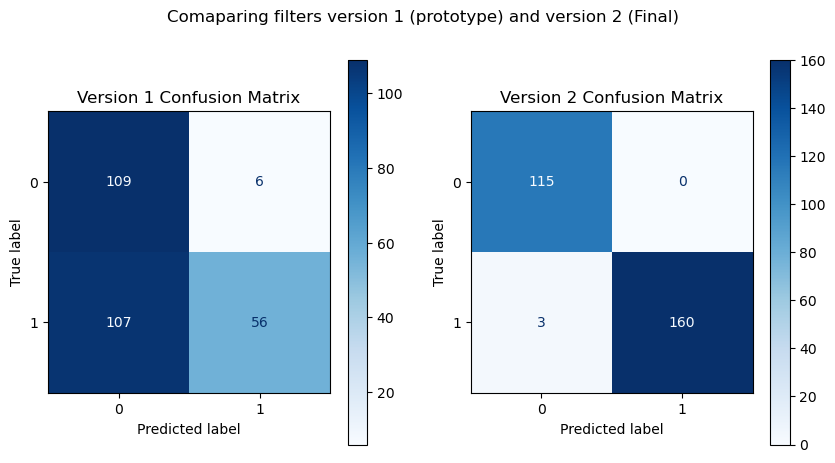

In [320]:
lab=['No ESG', 'ESG']

#report the confusion matrix for the training set
cm_v1 = confusion_matrix(ESG_data.S, 
                         ESG_data.V1)

disp_v1 = ConfusionMatrixDisplay(confusion_matrix=cm_v1)

#report the confusion matrix for the test set 
cm_v2 = confusion_matrix(ESG_data.S, 
                         ESG_data.V2)

disp_v2 = ConfusionMatrixDisplay(confusion_matrix=cm_v2)

#Plot the confusion matrix for the  training set and test set
fig, axs =plt.subplots(1,2, figsize=(10,5))

disp_v1.plot(cmap='Blues', ax=axs[0])
disp_v2.plot(cmap='Blues', ax=axs[1])

axs[0].set_title('Version 1 Confusion Matrix')
axs[1].set_title('Version 2 Confusion Matrix')

fig.suptitle("Comaparing filters version 1 (Prototype) and version 2 (Final)")

plt.show()